In [171]:
import pandas as pd
import seaborn as sns #matplotlib 기반의 시각화 라이브러리
import matplotlib.pyplot as plt #그래프 출력시
import matplotlib as mpl #그래프옵션
import numpy as np

#그래프 시각화 옵션 설정 함수
%matplotlib inline
#브라우저서 실행한 jupyter / ipython 에서 그래프/도식그림을
#볼 수 있게 해주는 구문

#그래프 한글설정
mpl.rc('font',family = "Malgun Gothic")

#그래프의 한글을 더욱 선명히 출력
#from iPython.display import set_matplotlib_formats
#set_matplotlib_formats('retina')
%config InlineBackend.figure_format = 'retina'

#그래프에서 음수값이 나올때, 깨지는 현상 방지
mpl.rc('axes', unicode_minus=False)

In [172]:
df1_1 = pd.read_excel('project1_data/1.1 고객기본정보(개인정보 제외)_추출.xlsx')

In [173]:
df1_2 = pd.read_excel('project1_data/1.2 고객상담정보(개인정보 제외)_추출.xlsx')

In [174]:
df2_1 = pd.read_excel('project1_data/2.1 상품정보_추출.xlsx')

In [175]:
df2_2 = pd.read_excel('project1_data/2.2 상품문의정보(개인정보 제외)_추출.xlsx')

In [176]:
df2_3 = pd.read_excel('project1_data/2.3 상품평정보(개인정보 제외)_추출.xlsx')

In [177]:
df3_1 = pd.read_excel('project1_data/3.1 주문정보(개인정보 제외)_추출.xlsx')

In [178]:
df4_1 = pd.read_excel('project1_data/4.1 결제정보(개인정보 제외)_추출.xlsx')

In [179]:
df5_1 = pd.read_excel('project1_data/5.1 환불정보(개인정보 제외)_추출.xlsx')

In [180]:
df6_1 = pd.read_excel('project1_data/6.1 옵션정보_추출.xlsx')

In [181]:
pd.set_option('mode.chained_assignment', None)
#df overwrite warning off

In [182]:
df11 = df1_1[['회원번호','성별']] #회원번호 및 성별 추출

In [183]:
df12 = df3_1[['회원번호','주문번호','상품번호','상품명','주문일시']] # 회원번호, 상품번호, 상품명 추출

In [184]:
df_all = pd.merge(df11, df12, on=['회원번호'], how='left') # 1-1 과 3-1 머지로 봉합

In [185]:
df13 = df2_1[['상품번호','상품명','카테고리명']] # 카테고리명 추가로 추출

In [186]:
df_all2 = pd.merge(df_all, df13,on = '상품번호') #1-1,3-1 봉합된 파일과 카테고리명 추가 한 파일 봉합

In [187]:
df_all2.isnull().sum() # 결측지 확인

회원번호      0
성별        0
주문번호      0
상품번호      0
상품명_x     0
주문일시      0
상품명_y     0
카테고리명    41
dtype: int64

In [188]:
df = df_all2.dropna()
df.head(2) # 결측지 제거

,회원번호,성별,주문번호,상품번호,상품명_x,주문일시,상품명_y,카테고리명
0,38655,-,1.805141e+15,G1805020937_5556,[기획특가][ZEUS] UHD LED TV 삼성 정품 모듈 패널_WT55CUHT,2018-05-14 12:51:51,[반반데이 특가][ZEUS] UHD LED TV 삼성 정품 모듈 패널_WT55CUHT,생활가전
1,38685,-,1.805141e+15,G1805020937_5556,[반반데이 특가][ZEUS] UHD LED TV 삼성 정품 모듈 패널_WT55CUHT,2018-05-14 13:51:10,[반반데이 특가][ZEUS] UHD LED TV 삼성 정품 모듈 패널_WT55CUHT,생활가전


In [189]:
df.isnull().sum() # 결측지 재확인

회원번호     0
성별       0
주문번호     0
상품번호     0
상품명_x    0
주문일시     0
상품명_y    0
카테고리명    0
dtype: int64

In [190]:
df.loc[df['성별']== '-'] = np.nan # '-' 값 nan으로 바꾸기

In [191]:
df = df.dropna(axis=0) # '-' 값 지우기

In [192]:
df_sales = df3_1[['주문번호','주문일시','수량','판매가','쿠폰할인액','진행구분']]
df_sales.head(1) #sales 에 df 3_1 추출

,주문번호,주문일시,수량,판매가,쿠폰할인액,진행구분
0,1809271013351348,2018-09-27 10:17:56,1,18900.0,0.0,구매확정


In [193]:
print(df_sales['진행구분'].unique()) 

['구매확정' '주문취소' '결제취소' '배송완료' '배송중' '주문완료' '교환완료' '환불완료' '배송준비중' '결제완료'
 '환불신청' '교환신청']


In [194]:
df_sales = df_sales[df_sales.진행구분 != '환불완료']
df_sales = df_sales[df_sales.진행구분 != '결제취소']
df_sales = df_sales[df_sales.진행구분 != '주문취소']
df_sales = df_sales[df_sales.진행구분 != '환불신청']
df_sales.head(4)

,주문번호,주문일시,수량,판매가,쿠폰할인액,진행구분
0,1809271013351348,2018-09-27 10:17:56,1,18900.0,0.0,구매확정
1,1810161844140235,2018-10-16 18:49:31,3,29700.0,0.0,구매확정
2,1805102302285528,2018-05-10 23:04:22,3,16500.0,0.0,구매확정
3,1806200954086380,2018-06-20 10:07:44,2,37800.0,0.0,구매확정


In [195]:
df_sales['매출'] = df_sales.판매가-df_sales.쿠폰할인액
df_sales.head(3)

,주문번호,주문일시,수량,판매가,쿠폰할인액,진행구분,매출
0,1809271013351348,2018-09-27 10:17:56,1,18900.0,0.0,구매확정,18900.0
1,1810161844140235,2018-10-16 18:49:31,3,29700.0,0.0,구매확정,29700.0
2,1805102302285528,2018-05-10 23:04:22,3,16500.0,0.0,구매확정,16500.0


In [196]:
df_all3 = pd.merge(df, df_sales)
df_all3.head(1) #df , sales 합체 - all3 지정

,회원번호,성별,주문번호,상품번호,상품명_x,주문일시,상품명_y,카테고리명,수량,판매가,쿠폰할인액,진행구분,매출
0,20323.0,M,1.805161e+15,G1805031025_6040,[반반데이 특가][스위스밀리터리] 12V 충전식 전동드릴 (일반형)_SM-1200M,2018-05-16 10:02:15,[반반데이 특가][스위스밀리터리] 12V 충전식 전동드릴 (일반형)_SM-1200M,공구/철물/목재/리폼,1,24900.0,0.0,구매확정,24900.0


In [197]:
df_all4 = pd.DataFrame(df_all3.groupby(['카테고리명','성별'])['매출'].sum())
df_all4

매출
카테고리명         성별             
2018 추석선물     F      106410.0
DIY가구/손잡이/도어락 F     4187830.0
              M     8461450.0
공구            M     1197910.0
공구/철물/목재/리폼   F    57067406.0
              M   131601132.0
벽지/바닥재/타일     F    35787438.0
              M    21231557.0
생활가전          F   116664480.0
              M   307544925.0
셀프인테리어        F      114200.0
              M      434290.0
수납용품          F    11880033.0
              M     6460770.0
시공/렌탈서비스      F     7194010.0
              M     5354270.0
원예            M       10740.0
임직원 매장        F    97719700.0
              M   250734071.0
주방/욕실/청소용품    F   101098295.0
              M    55663539.0
침실/거실/주방가구    F    82051350.0
              M    58148673.0
페인트/스텐실/도구    F     9430490.0
              M    10383060.0
하드웨어          M       75340.0
학생/사무/유아동가구   F   116438997.0
              M    77206457.0
홈데코           M      224960.0
홈데코레이션        F    42309778.0
              M    31449693.0
홈퍼니싱          M      679200.0

In [198]:
#시각화에 사용하기 위해 성별합산(df_all)에서 카테고리를 언인덱싱화
df_sex = df_all4.reset_index() 

In [199]:
df_sex.head(2) # 인덱스 확인

,카테고리명,성별,매출
0,2018 추석선물,F,106410.0
1,DIY가구/손잡이/도어락,F,4187830.0


<Figure size 1440x1440 with 0 Axes>

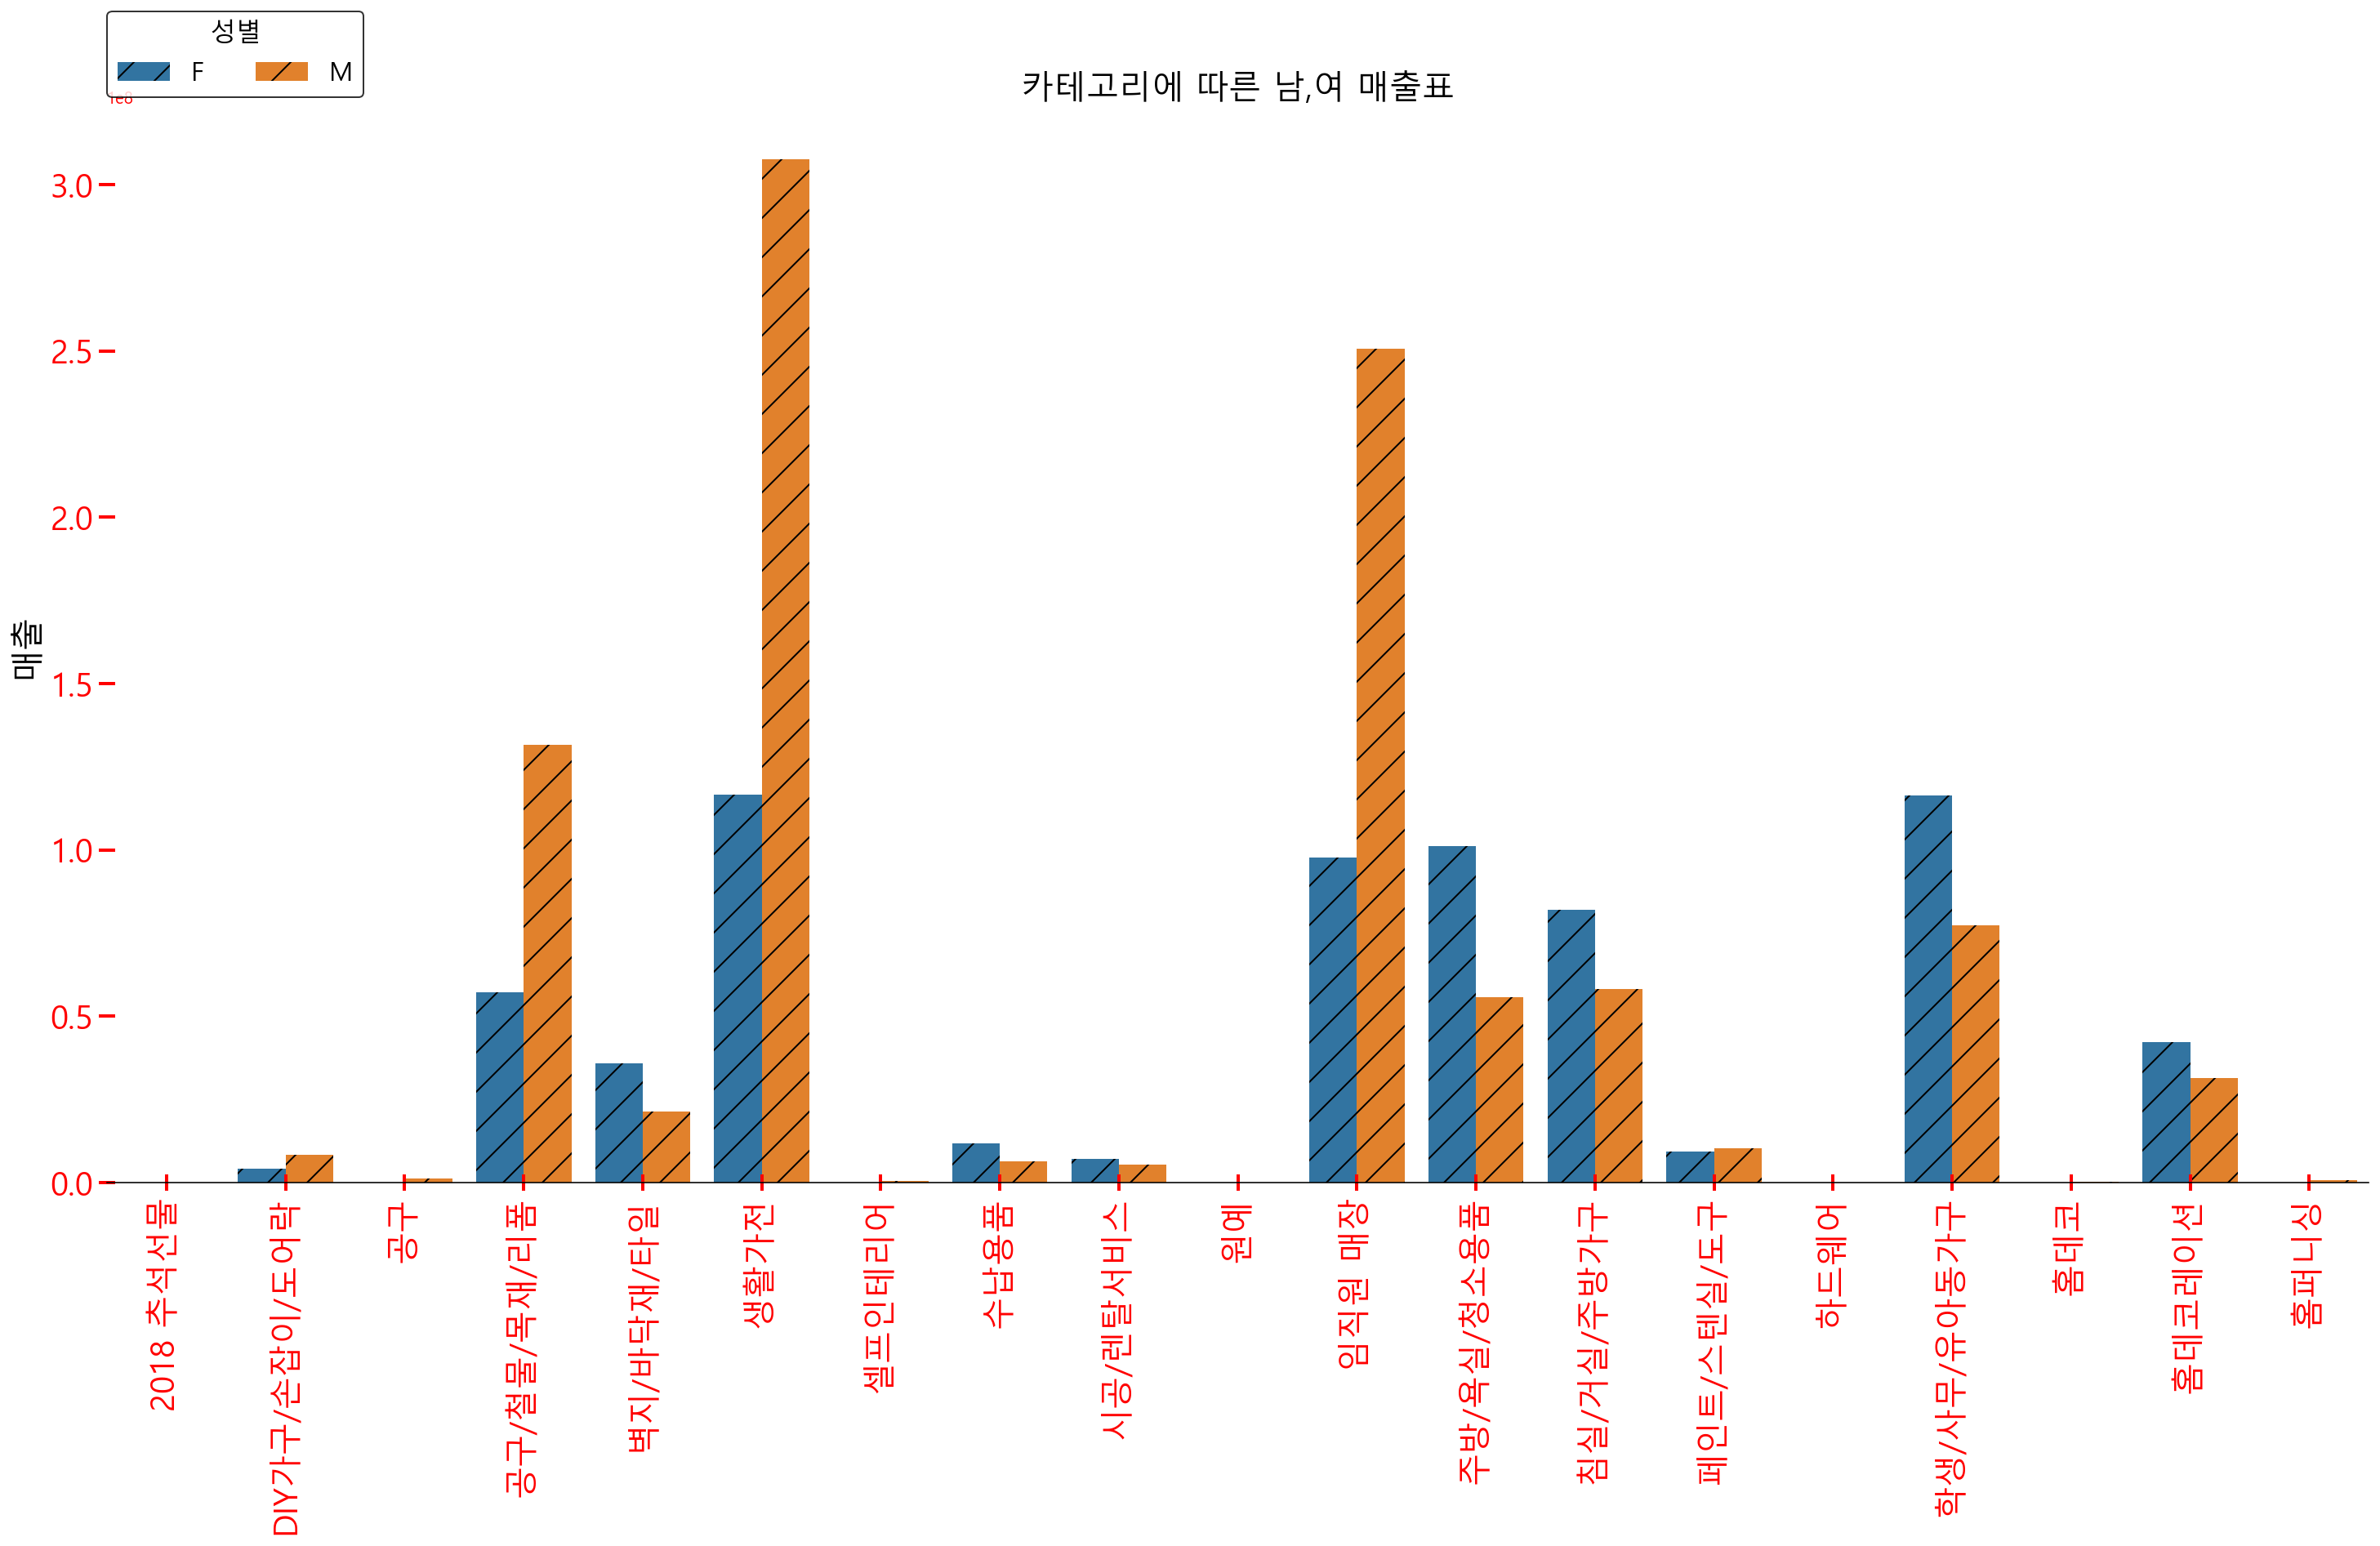

In [208]:
# 시각화
plt.figure(figsize=[20,20])
g = sns.catplot(
    data=df_sex, kind="bar",
    x="카테고리명", y="매출",hue ='성별',  height=10, legend = False, aspect=2,hatch='/')
g.despine(left=True)
g.set_axis_labels("", "매출")
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.ylabel('매출', fontsize=20)
plt.title('카테고리에 따른 남,여 매출표', size=20)
plt.legend(title='성별',loc=(0,1.01), ncol=3, fontsize=16, edgecolor='k',title_fontsize=16)

plt.tick_params(axis='x', direction='inout',length=10,width=2,colors='r',labelsize=20 )
plt.tick_params(axis='y', direction='inout',length=10,width=2,colors='r',labelsize=20 )

In [201]:
# 성별당 매출 건수 카테고리별로 비교
df_all3['매출건수'] = 1
df_all3.head(1)

,회원번호,성별,주문번호,상품번호,상품명_x,주문일시,상품명_y,카테고리명,수량,판매가,쿠폰할인액,진행구분,매출,매출건수
0,20323.0,M,1.805161e+15,G1805031025_6040,[반반데이 특가][스위스밀리터리] 12V 충전식 전동드릴 (일반형)_SM-1200M,2018-05-16 10:02:15,[반반데이 특가][스위스밀리터리] 12V 충전식 전동드릴 (일반형)_SM-1200M,공구/철물/목재/리폼,1,24900.0,0.0,구매확정,24900.0,1


In [202]:
df_m = pd.DataFrame(df_all3.groupby(['카테고리명','성별'])['매출건수'].sum())
df_m # 매출건수에 따른 남자, 여자 분류

매출건수
카테고리명         성별      
2018 추석선물     F      2
DIY가구/손잡이/도어락 F    155
              M    271
공구            M     89
공구/철물/목재/리폼   F   1475
              M   3667
벽지/바닥재/타일     F    949
              M    754
생활가전          F    935
              M   1892
셀프인테리어        F      4
              M     13
수납용품          F    545
              M    352
시공/렌탈서비스      F      9
              M     11
원예            M      6
임직원 매장        F    719
              M   1986
주방/욕실/청소용품    F   5462
              M   2673
침실/거실/주방가구    F   1024
              M    592
페인트/스텐실/도구    F    408
              M    453
하드웨어          M     15
학생/사무/유아동가구   F    781
              M    680
홈데코           M     11
홈데코레이션        F   1466
              M   1161
홈퍼니싱          M      1

In [203]:
#시각화에 사용하기 위해 성별합산(df_m)에서 카테고리를 언인덱싱화
df_ca = df_m.reset_index()
df_ca.head(2) 

,카테고리명,성별,매출건수
0,2018 추석선물,F,2
1,DIY가구/손잡이/도어락,F,155


<Figure size 1440x1440 with 0 Axes>

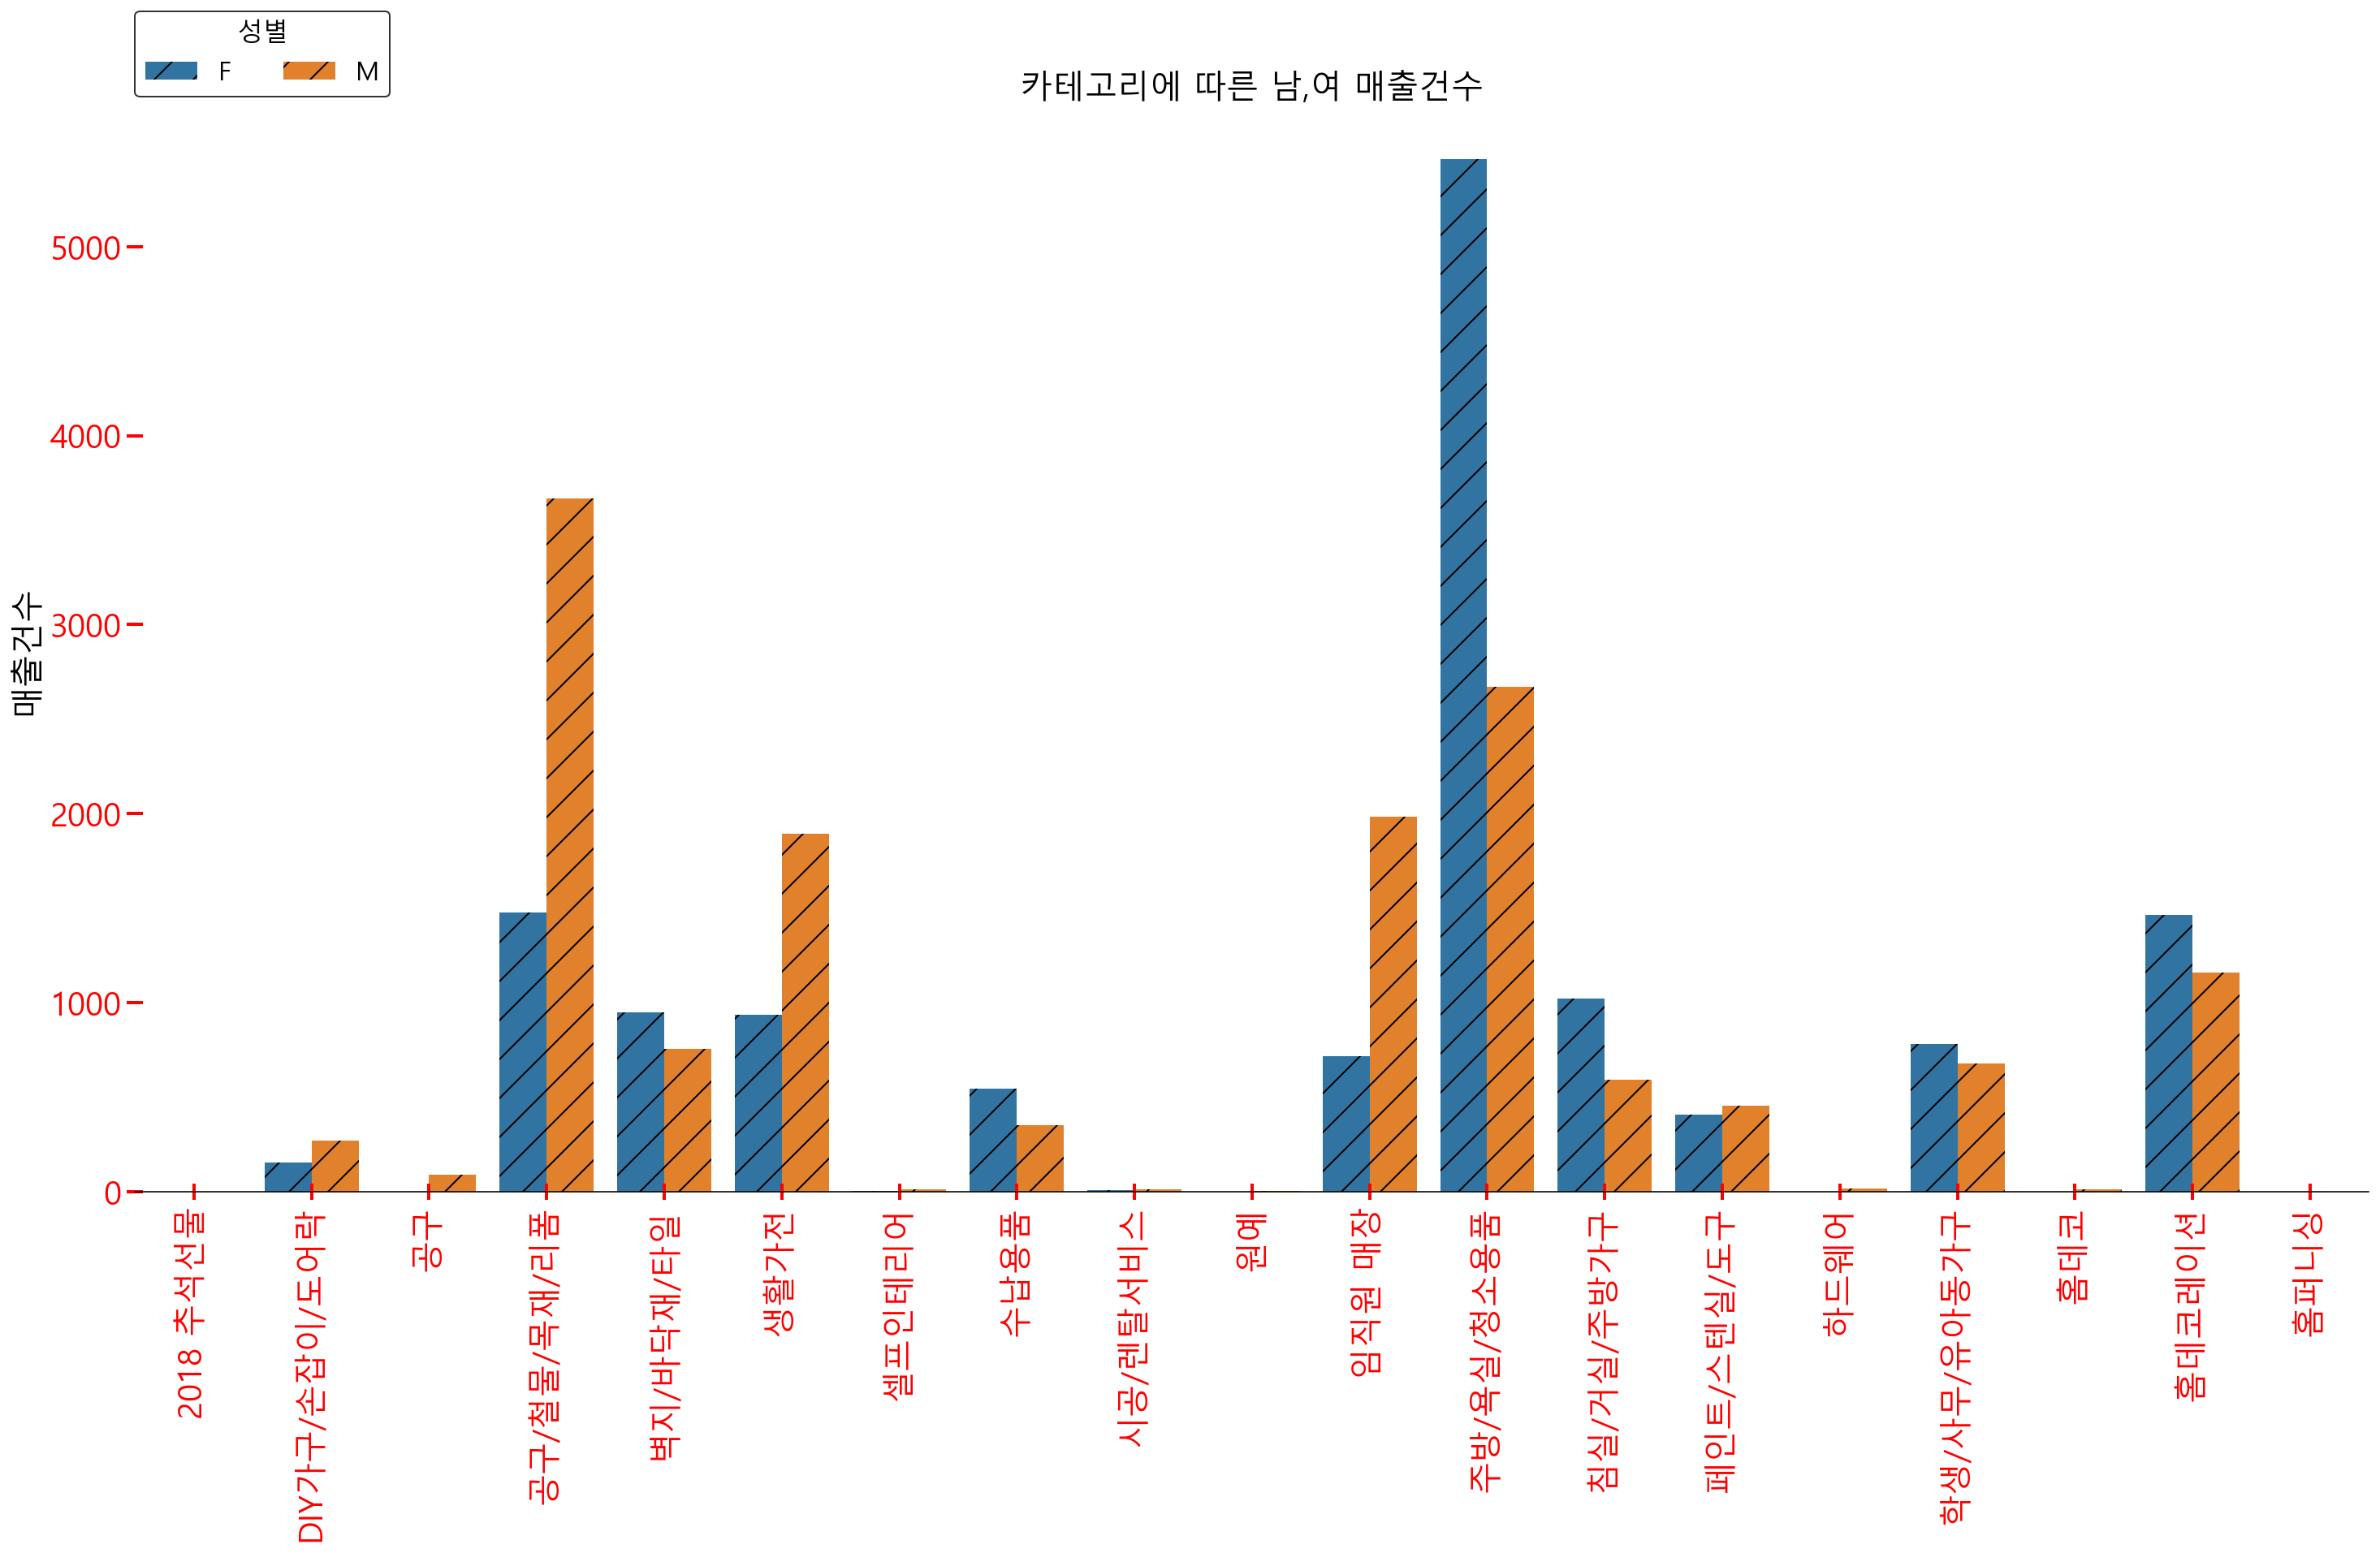

In [207]:
#시각화
plt.figure(figsize=[20,20])
g = sns.catplot(
    data=df_ca, kind="bar",
    x="카테고리명", y="매출건수", hue="성별", legend = False, height=10, aspect=2,hatch='/')
g.despine(left=True)
g.set_axis_labels("", "매출건수")
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.ylabel('매출건수', fontsize=20)
plt.title('카테고리에 따른 남,여 매출건수', size=20)
plt.legend(title='성별',loc=(0,1.01), ncol=3, fontsize=16, edgecolor='k',title_fontsize=16)

plt.tick_params(axis='x',direction='inout',length=10,width=2,colors='r',labelsize=20 )
plt.tick_params(axis='y',direction='inout',length=10,width=2,colors='r',labelsize=20 )